Interval 300.0-600.0:
  Unique Collection IDs: 17
  Non-Unique Collection IDs: 3
  Unique Machine IDs: 20
Interval 600.0-900.0:
  Unique Collection IDs: 20
  Non-Unique Collection IDs: 4
  Unique Machine IDs: 24
Interval 900.0-1200.0:
  Unique Collection IDs: 29
  Non-Unique Collection IDs: 2
  Unique Machine IDs: 33
Interval 1200.0-1500.0:
  Unique Collection IDs: 21
  Non-Unique Collection IDs: 2
  Unique Machine IDs: 23
Interval 1500.0-1800.0:
  Unique Collection IDs: 14
  Non-Unique Collection IDs: 0
  Unique Machine IDs: 14
Interval 1800.0-2100.0:
  Unique Collection IDs: 16
  Non-Unique Collection IDs: 5
  Unique Machine IDs: 22
Interval 2100.0-2400.0:
  Unique Collection IDs: 14
  Non-Unique Collection IDs: 0
  Unique Machine IDs: 14
Interval 2400.0-2700.0:
  Unique Collection IDs: 17
  Non-Unique Collection IDs: 3
  Unique Machine IDs: 20
Interval 2700.0-3000.0:
  Unique Collection IDs: 9
  Non-Unique Collection IDs: 0
  Unique Machine IDs: 9
Interval 3000.0-3300.0:
  Unique Co

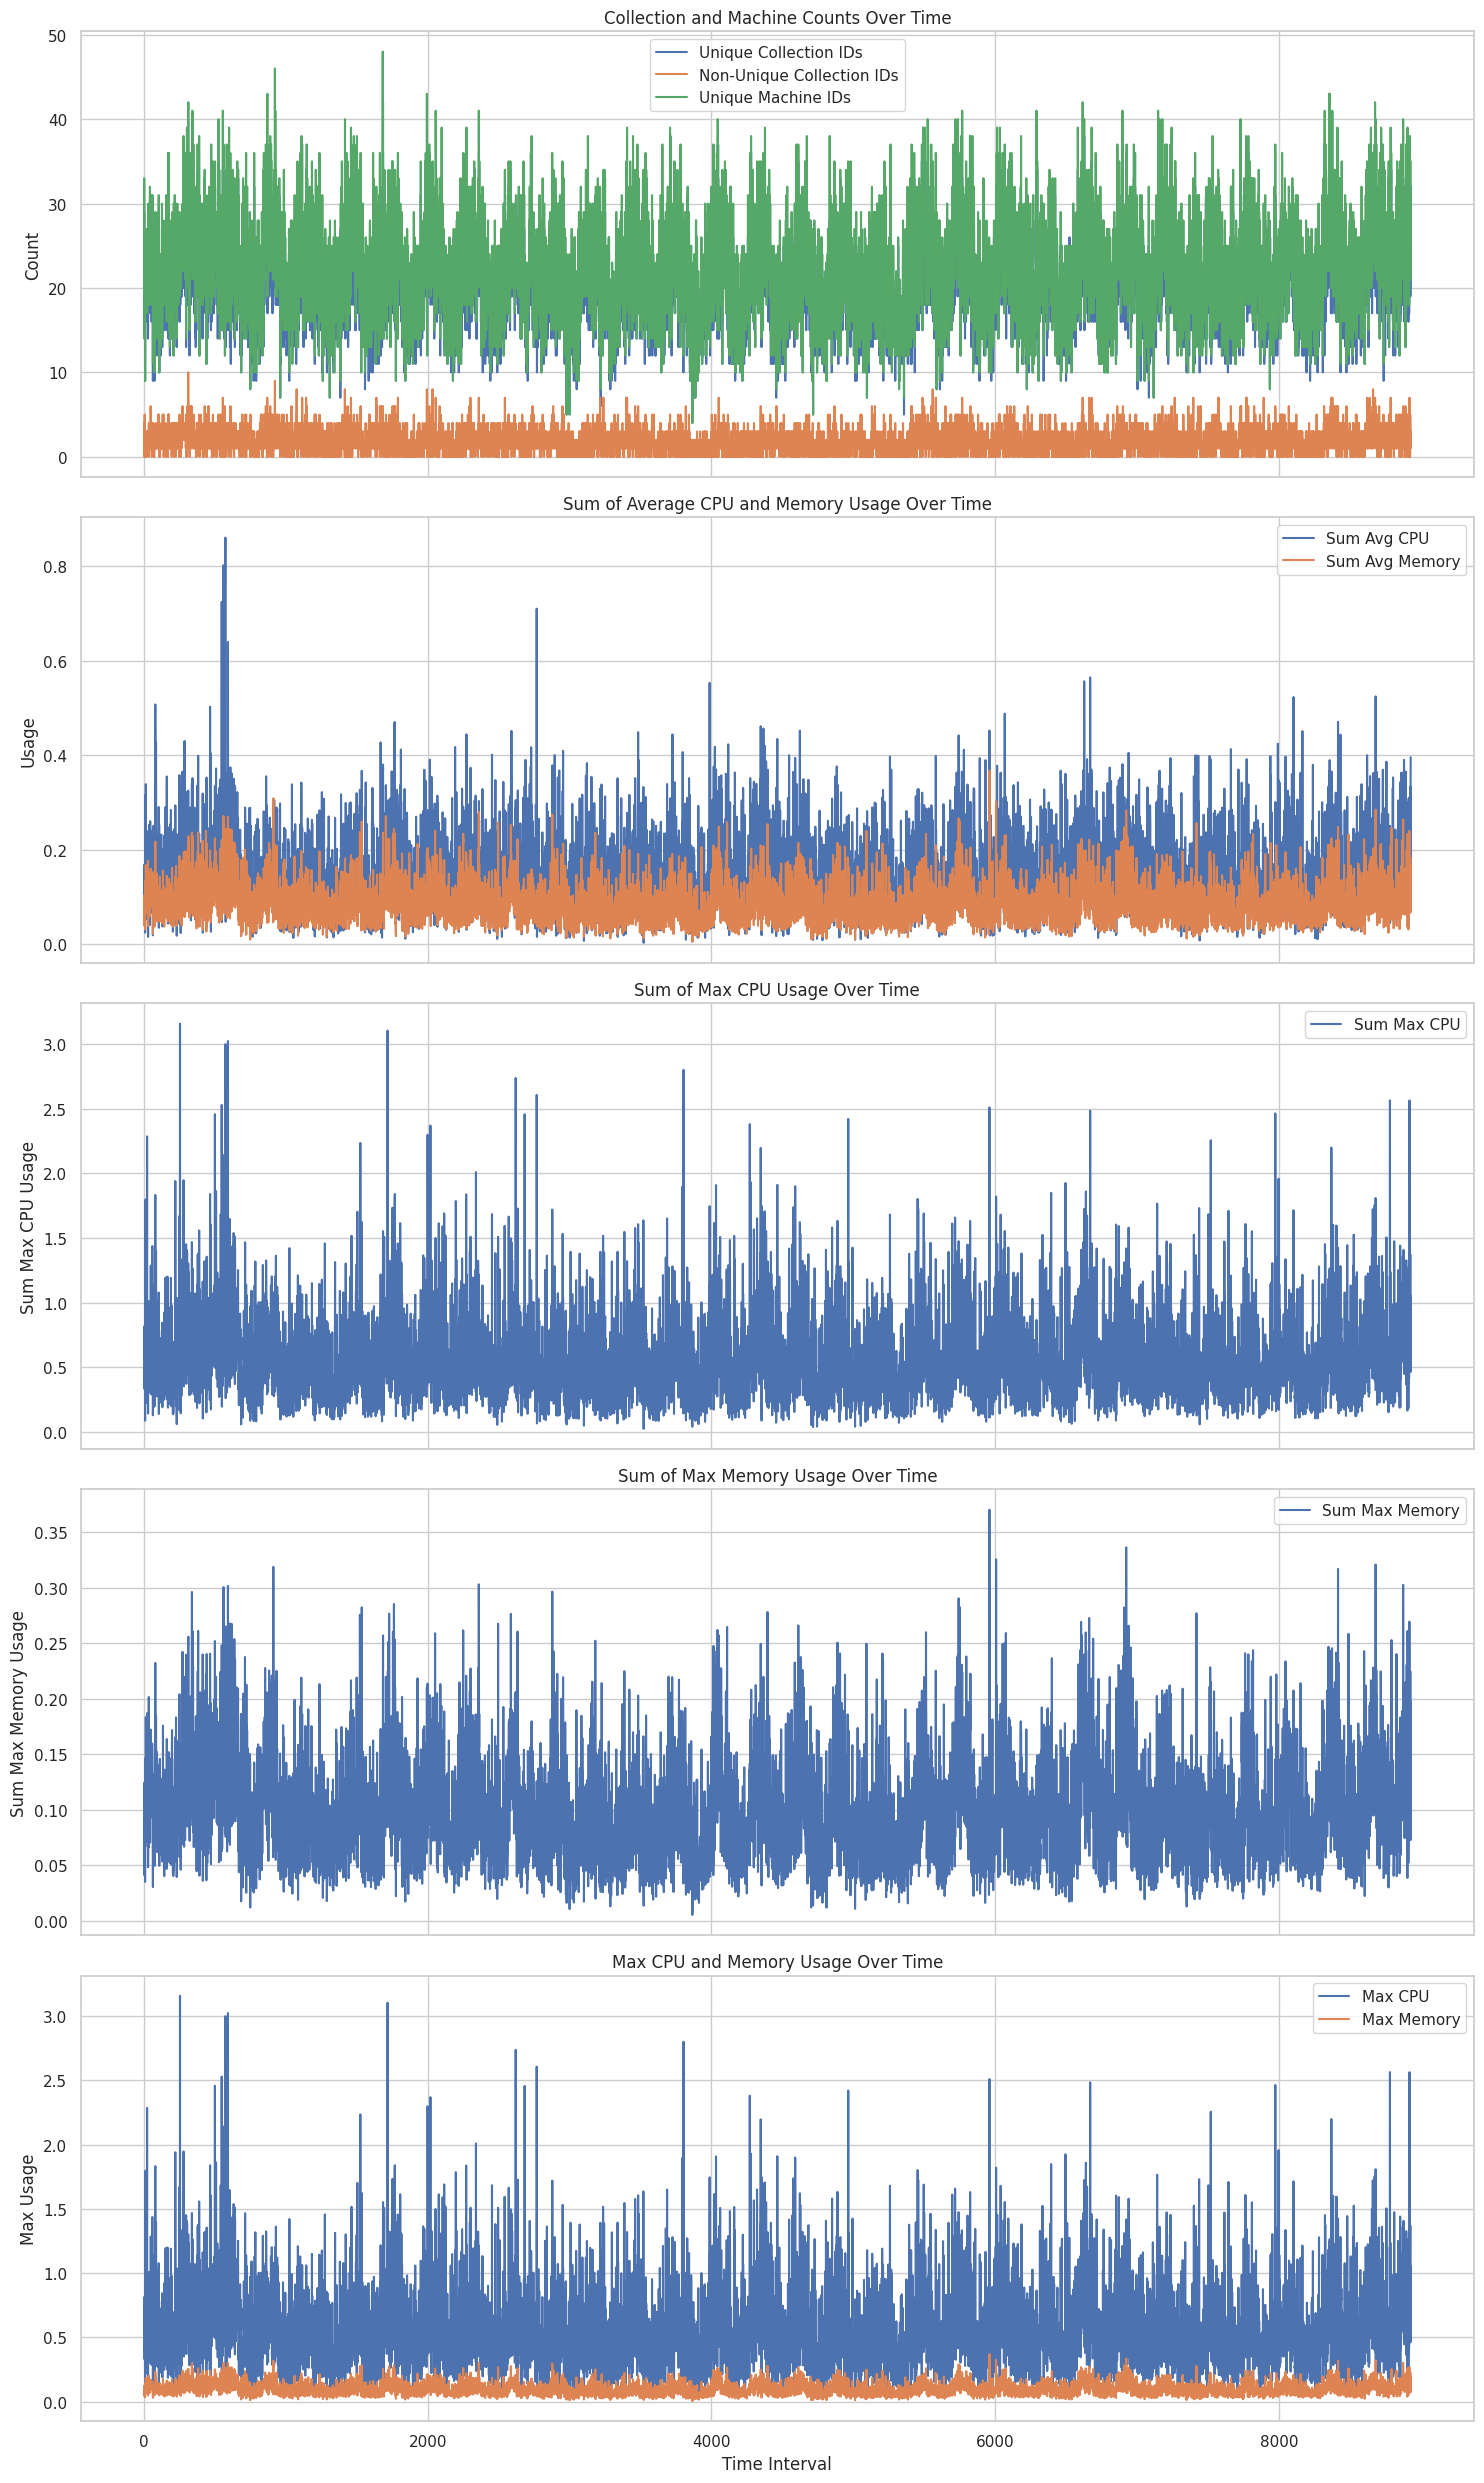

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset extracted from BigQuery
file_path = "/home/nsmsc/merged_instance_usage_200k - new.csv"
data = pd.read_csv(file_path)

# Convert start and end times from microseconds to seconds
data['start_time'] = data['start_time'] / 1e6
data['end_time'] = data['end_time'] / 1e6

# Sort data by start time
data = data.sort_values(by='start_time')

# Define the interval length 
interval_length = 300

def process_interval(interval_data):
    
    collection_id_counts = interval_data['collection_id'].value_counts()

  
    non_unique_collection_ids_count = collection_id_counts[collection_id_counts > 1].count()


    unique_collection_ids_count = interval_data['collection_id'].nunique()

  
    unique_machine_ids_count = interval_data['machine_id'].nunique()

    
    sum_avg_cpu = interval_data['average_usage.cpus'].sum()
    sum_avg_memory = interval_data['average_usage.memory'].sum()
    sum_max_cpu = interval_data['maximum_usage.cpus'].sum()
    sum_max_memory = interval_data['maximum_usage.memory'].sum()

    return {
        'unique_collection_ids': unique_collection_ids_count,
        'non_unique_collection_ids': non_unique_collection_ids_count,
        'unique_machine_ids': unique_machine_ids_count,
        'sum_avg_cpu': sum_avg_cpu,
        'sum_avg_memory': sum_avg_memory,
        'sum_max_cpu': sum_max_cpu,
        'sum_max_memory': sum_max_memory
    }


results = []

# Process the data in 300-second intervals
start_time = data['start_time'].min()
end_time = data['start_time'].max()

current_start = start_time

while current_start < end_time:
    current_end = current_start + interval_length
    interval_data = data[(data['start_time'] >= current_start) & (data['start_time'] < current_end)]
    if not interval_data.empty:
        interval_result = process_interval(interval_data)
        results.append(interval_result)
        # Print the unique and non-unique counts for each interval
        print(f"Interval {current_start}-{current_end}:")
        print(f"  Unique Collection IDs: {interval_result['unique_collection_ids']}")
        print(f"  Non-Unique Collection IDs: {interval_result['non_unique_collection_ids']}")
        print(f"  Unique Machine IDs: {interval_result['unique_machine_ids']}")
    current_start = current_end


results_df = pd.DataFrame(results)


sns.set(style="whitegrid")

fig, axs = plt.subplots(5, 1, figsize=(15, 25), sharex=True)


sns.lineplot(data=results_df, x=results_df.index, y='unique_collection_ids', ax=axs[0], label='Unique Collection IDs')
sns.lineplot(data=results_df, x=results_df.index, y='non_unique_collection_ids', ax=axs[0], label='Non-Unique Collection IDs')
sns.lineplot(data=results_df, x=results_df.index, y='unique_machine_ids', ax=axs[0], label='Unique Machine IDs')
axs[0].set_title('Collection and Machine Counts Over Time')
axs[0].set_ylabel('Count')
axs[0].legend()

sns.lineplot(data=results_df, x=results_df.index, y='sum_avg_cpu', ax=axs[1], label='Sum Avg CPU')
sns.lineplot(data=results_df, x=results_df.index, y='sum_avg_memory', ax=axs[1], label='Sum Avg Memory')
axs[1].set_title('Sum of Average CPU and Memory Usage Over Time')
axs[1].set_ylabel('Usage')


sns.lineplot(data=results_df, x=results_df.index, y='sum_max_cpu', ax=axs[2], label='Sum Max CPU')
axs[2].set_title('Sum of Max CPU Usage Over Time')
axs[2].set_ylabel('Sum Max CPU Usage')


sns.lineplot(data=results_df, x=results_df.index, y='sum_max_memory', ax=axs[3], label='Sum Max Memory')
axs[3].set_title('Sum of Max Memory Usage Over Time')
axs[3].set_ylabel('Sum Max Memory Usage')


sns.lineplot(data=results_df, x=results_df.index, y='sum_max_cpu', ax=axs[4], label='Max CPU')
sns.lineplot(data=results_df, x=results_df.index, y='sum_max_memory', ax=axs[4], label='Max Memory')
axs[4].set_title('Max CPU and Memory Usage Over Time')
axs[4].set_xlabel('Time Interval')
axs[4].set_ylabel('Max Usage')

plt.tight_layout()
plt.show()


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Function to perform ADF test 
def adf_test(series, title=''):
    """
    Pass in a time series and perform the Augmented Dickey-Fuller test.
    """
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Test Statistic', 'p-value', '# Lags Used', 'Number of Observations Used']
    for value, label in zip(result, labels):
        print(f'{label}: {value}')
    if result[1] <= 0.05:
        print("The series is likely stationary.")
    else:
        print("The series is likely non-stationary.")
    print()

# ADF test 
adf_test(results_df['unique_collection_ids'], title='Unique Collection IDs')
adf_test(results_df['non_unique_collection_ids'], title='Non-Unique Collection IDs')
adf_test(results_df['unique_machine_ids'], title='Unique Machine IDs')
adf_test(results_df['sum_avg_cpu'], title='Sum of Average CPU Usage')
adf_test(results_df['sum_avg_memory'], title='Sum of Average Memory Usage')
adf_test(results_df['sum_max_cpu'], title='Sum of Maximum CPU Usage')
adf_test(results_df['sum_max_memory'], title='Sum of Maximum Memory Usage')


Augmented Dickey-Fuller Test: Unique Collection IDs
ADF Test Statistic: -8.47139546890212
p-value: 1.474360411236075e-13
# Lags Used: 25
Number of Observations Used: 8903
The series is likely stationary.

Augmented Dickey-Fuller Test: Non-Unique Collection IDs
ADF Test Statistic: -8.709976540609153
p-value: 3.613198946132887e-14
# Lags Used: 36
Number of Observations Used: 8892
The series is likely stationary.

Augmented Dickey-Fuller Test: Unique Machine IDs
ADF Test Statistic: -8.446254458762615
p-value: 1.7096444786420636e-13
# Lags Used: 25
Number of Observations Used: 8903
The series is likely stationary.

Augmented Dickey-Fuller Test: Sum of Average CPU Usage
ADF Test Statistic: -8.80296323289037
p-value: 2.088144230093917e-14
# Lags Used: 32
Number of Observations Used: 8896
The series is likely stationary.

Augmented Dickey-Fuller Test: Sum of Average Memory Usage
ADF Test Statistic: -7.960432735843894
p-value: 2.9586405667390392e-12
# Lags Used: 30
Number of Observations Used:

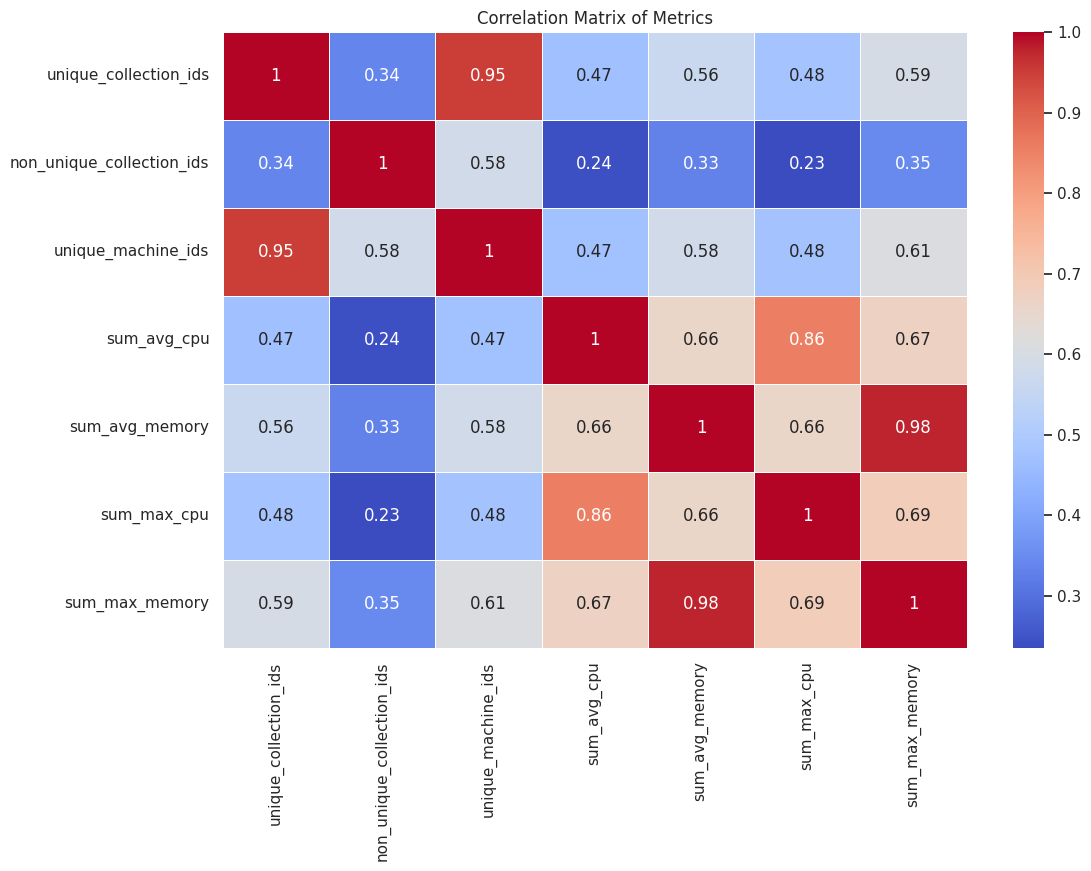

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = results_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix of Metrics')
plt.show()
